In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#Keeping the random data the same over multiple runs of the code.
np.random.seed(42)

#Storing our randomly generated data and labels.
data = []
groups = []
labels_var = []
labels_size = []

#The values we use for the standard deviations and the sample sizes.
variability = [5, 20, 50]
sizes = [10, 100, 10000]

#Generating data for each group for each combination of variability and sample size.
for var in variability:
    for size in sizes:
        data.extend(np.random.normal(20,var,size))
        data.extend(np.random.normal(35,var,size))
        labels_var.extend([var]*size*2)
        labels_size.extend([size]*size*2)
        groups.extend(['group1']*size)
        groups.extend(['group2']*size)


In [23]:
#Putting the data together in a data frame and checking it.

data = pd.DataFrame({'data': data, 
                     'groups' : groups,
                    'variability':labels_var,
                    'size':labels_size})
#print(data.head())
data


,data,groups,variability,size
0,22.483571,group1,5,10
1,19.308678,group1,5,10
2,23.238443,group1,5,10
3,27.615149,group1,5,10
4,18.829233,group1,5,10
5,18.829315,group1,5,10
6,27.896064,group1,5,10
7,23.837174,group1,5,10
8,17.652628,group1,5,10
9,22.712800,group1,5,10


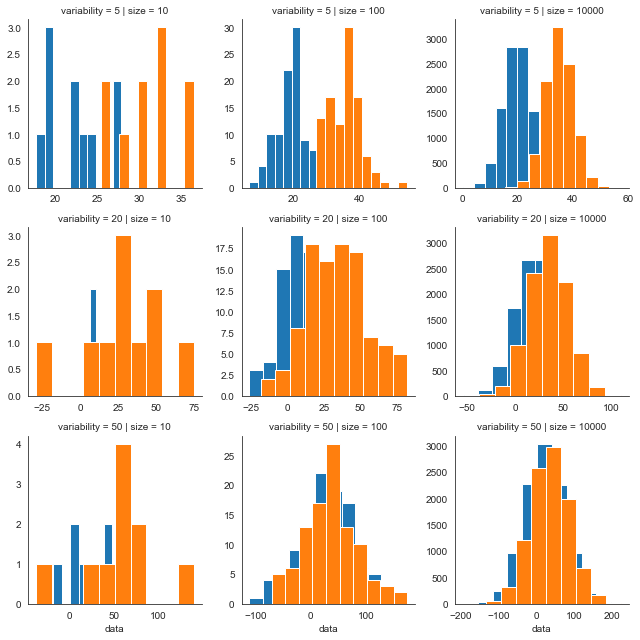

In [20]:
# Plotting the data.  
# Because we organized the data frame in a stacked (long) format, the plotting code is very straightforward.
sns.set_style('white')

g = sns.FacetGrid(data, col="size", row="variability", hue='groups', sharex=False, sharey=False)
g.map(plt.hist,'data')
plt.show()

In [24]:
# Setting the three non-data columns to work as multi-indices. 
# This makes it much easier to get subsections of stacked data.
data_test = data.set_index(['groups','size','variability'])

# Storing our t-values and p-values (we'll get to p-values in a sec).
tvalues=[]
pvalues=[]

#For each combination of sample size and variability, compare the two groups using a t-test
for size in sizes:
    for var in variability:
        a = data_test['data'].xs(('group1',size,var),level=('groups','size','variability'))
        b = data_test['data'].xs(('group2',size,var),level=('groups','size','variability'))
        tval,pval=stats.ttest_ind(b, a,equal_var=True)
        tvalues.append(tval)
        pvalues.append(pval)


In [28]:
#Creating a data frame for plotting purposes.
tvalues_plot=pd.DataFrame({'t':tvalues,
                           'p':pvalues,
                          'variability':variability*3,
                          'size':np.repeat(sizes,3)})

tvalues_plot

,t,p,variability,size
0,5.326814,4.601957e-05,5,10
1,0.572449,5.740987e-01,20,10
2,1.426503,1.708386e-01,50,10
3,23.489845,3.721191e-59,5,100
4,5.531061,9.986173e-08,20,100
5,1.545027,1.239366e-01,50,100
6,212.593473,0.000000e+00,5,10000
7,53.276388,0.000000e+00,20,10000
8,21.222612,7.263830e-99,50,10000


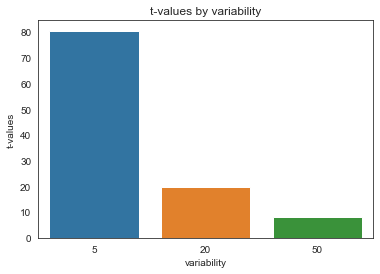

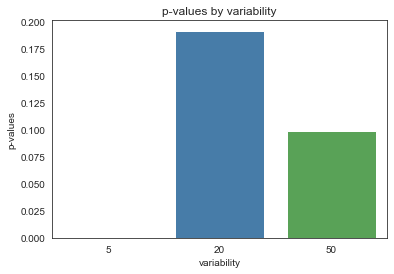

In [34]:

# t-values by variability
ax = sns.barplot(y='t',x='variability',ci=None,data=tvalues_plot)
ax.set(ylabel='t-values',title='t-values by variability')
plt.show()

# t-values by sample size
#ax = sns.barplot(y='t',x='size',ci=None,data=tvalues_plot,palette='Set3')
#ax.set(ylabel='t-values',title='t-values by sample size')

#p-values by sample size
ax = sns.barplot(y='p',x='variability',ci=None,data=tvalues_plot,palette='Set1')
ax.set(ylabel='p-values',title='p-values by variability')
plt.show()